In [183]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups (2).csv


In [185]:
startups =pd.read_csv('50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Perform EDA

In [186]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


As we can see, State is a Categorical data we need to convert it into numerical values.

In [187]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [188]:
startups1 = startups.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'market',"State":'state',"Profit":'profit'},axis=1)
startups1.head()

,RnD,admin,market,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [189]:
startups1.isna().sum()

RnD       0
admin     0
market    0
state     0
profit    0
dtype: int64

In [190]:
startups1[startups1.duplicated()]

,RnD,admin,market,state,profit


Check Correlation

In [191]:
startups1.corr()

,RnD,admin,market,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
market,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


Scatterplot between variables along with histograms

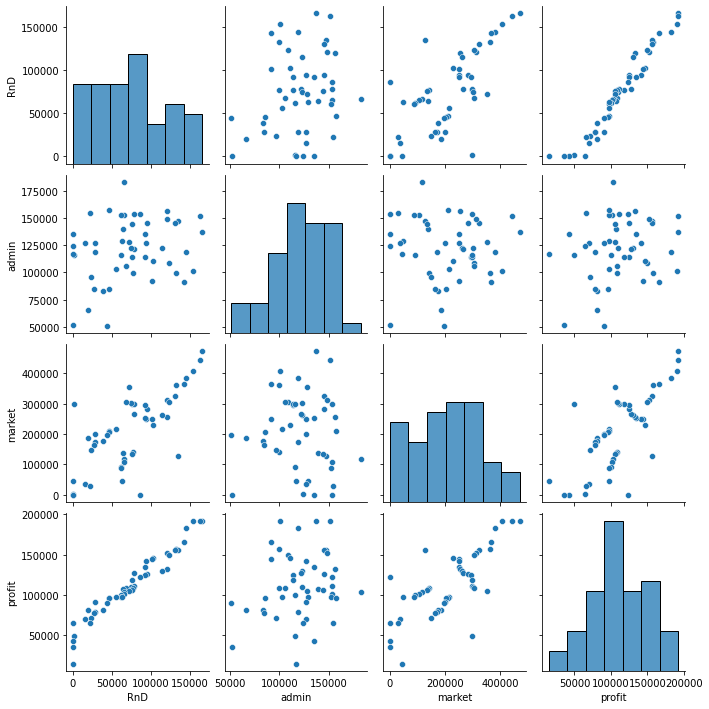

In [192]:
sns.pairplot(startups1)
plt.show()

#Build the model

In [193]:
model = smf.ols("profit~RnD+admin+market", data = startups1).fit()

#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RnD          17.846374
admin        -0.525507
market        1.655077
dtype: float64 
 Intercept    1.057379e-09
RnD          2.634968e-22
admin        6.017551e-01
market       1.047168e-01
dtype: float64


In [194]:
#Coefficients
model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
market           0.027228
dtype: float64

In [195]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [196]:
#Check the accuracy of the mode
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)

#Calculating VIF

In [197]:
rsq_profit = smf.ols('profit~RnD+admin+market',data=startups1).fit().rsquared  
vif_profit = 1/(1-rsq_profit) # 16.33

# Storing vif values in a data frame
p1 = {'Variables':['profit'],'VIF':[vif_profit]}
Vif_frame = pd.DataFrame(p1)  
Vif_frame

,Variables,VIF
0,profit,20.302917


#Residual Analysis

Text(0.5, 1.0, 'Q-Q plot of residuals')

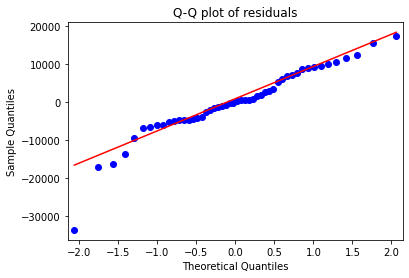

In [198]:
#Test for Normality of Residuals (Q-Q Plot)
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot of residuals")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


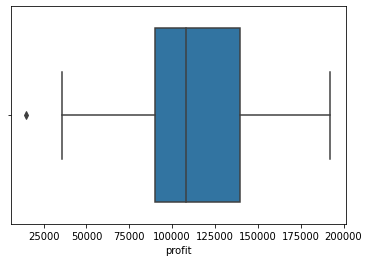

In [199]:
# Check for outlier
sns.boxplot(startups1['profit'])
plt.show()

In [200]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

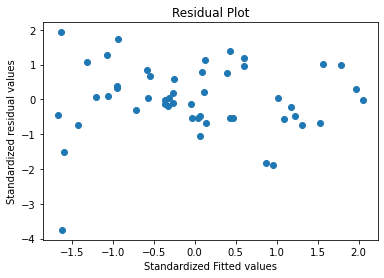

In [201]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

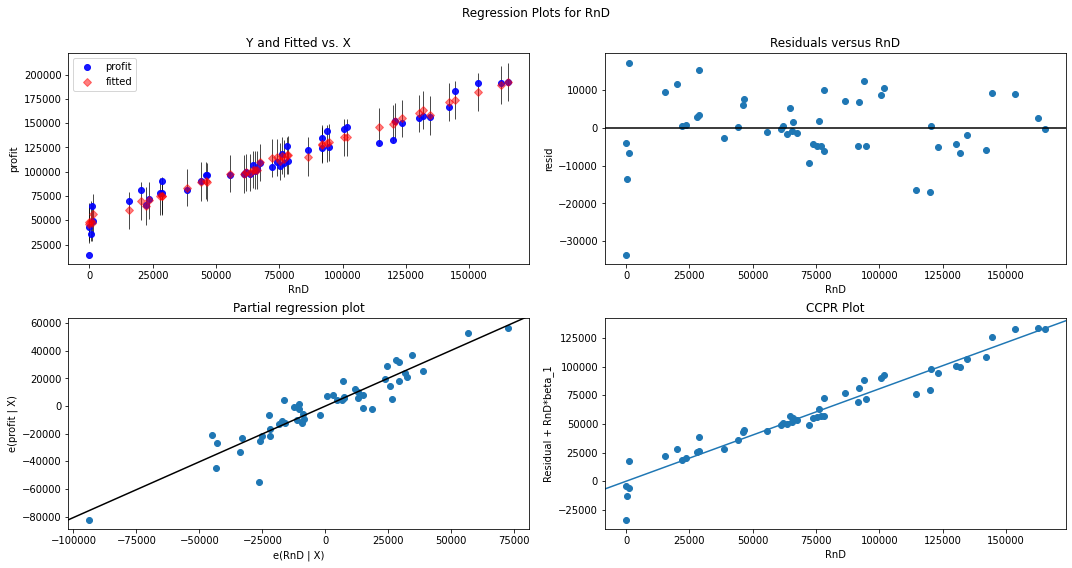

In [202]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD", fig=fig)
plt.show()

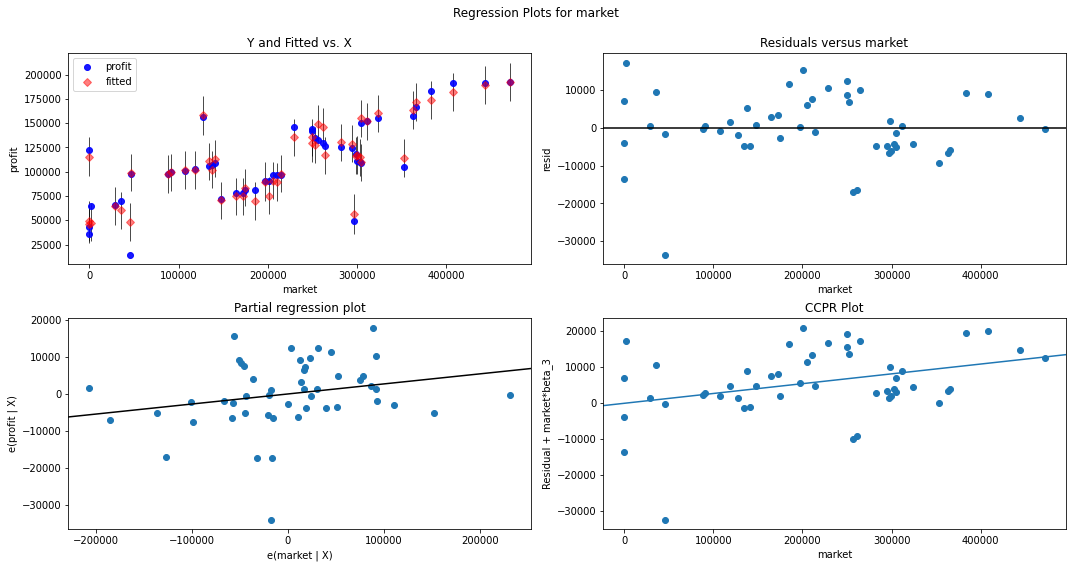

In [203]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "market", fig=fig)
plt.show()

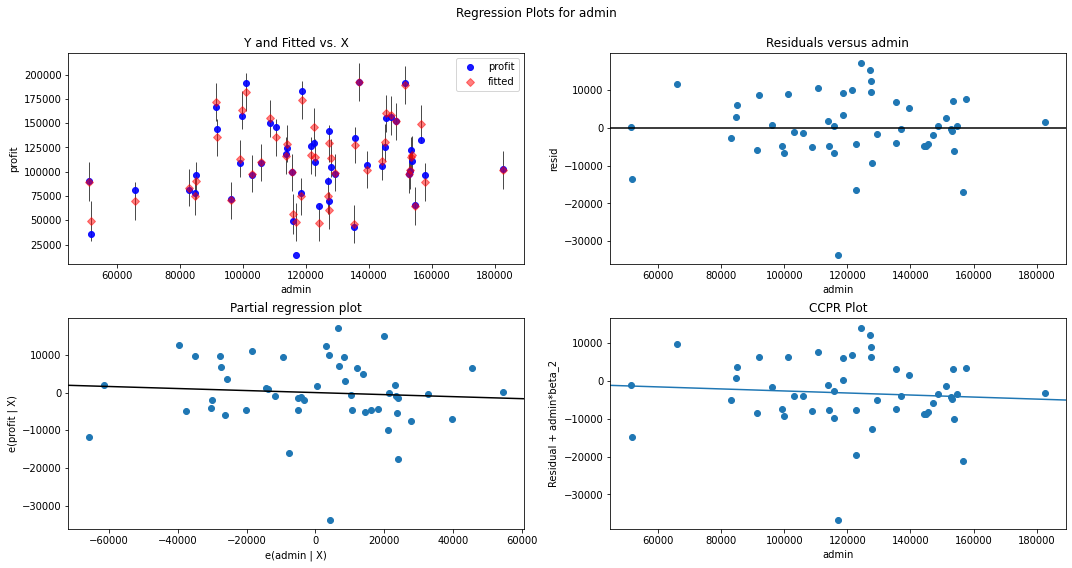

In [204]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

#Detecting Influencers/Outliers using Cook’s Distance

In [205]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-206-ac956c196cc8>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startups1)), np.round(c, 3))


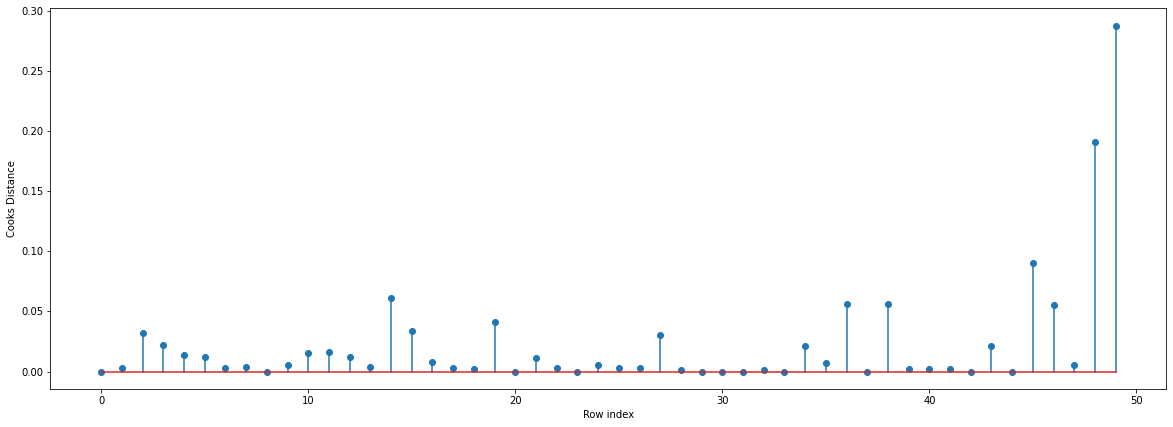

In [206]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [207]:
#Lets find out the quartile ranges
Q1 = np.quantile(startups1.profit,0.25)
Q3 = np.quantile(startups1.profit,0.75)
M = np.median(startups1.profit)
IQR = Q3 - Q1
UW = Q3+(1.5*IQR)
LW = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', M,'\n' 'Third Quantile=', Q3,'\n'
      'Inter Quartile Range=', IQR,'\n' 'Upper Whisker=', UW,'\n' 'Lower Whisker=', LW)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [208]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [209]:
print('The outlier is present in the boxplot :',np.argmax(c))

The outlier is present in the boxplot : 49


So, there is an outlier in row 49. We need to remove it.

# High Infulence Points

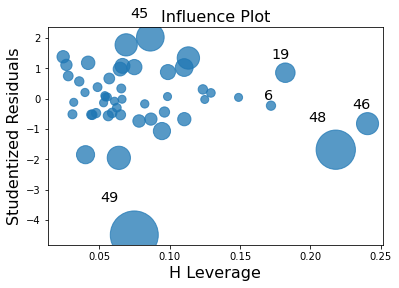

In [210]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [211]:
k = startups1.shape[1]
n = startups1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

From the above plot, it is evident that data point 48 and 49 are the influencers

In [212]:
startups1[startups1.index.isin([48,49])]

,RnD,admin,market,state,profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [213]:
startups1.head()

,RnD,admin,market,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Clearly we can see the differences in various variable values.

#Improving the model

In [214]:
# Load the dataset in a new variable
startups_new = pd.read_csv("50_Startups.csv")

In [215]:
# Rename the columns
startups_new = startups_new.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'market',"State":'state',"Profit":'profit'},axis=1)
startups_new

,RnD,admin,market,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [216]:
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Profit after removing outliers')

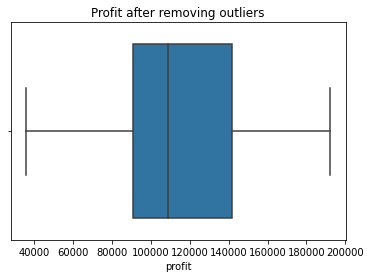

In [217]:
drop_outliers(startups_new, 'profit')
sns.boxplot(startups_new.profit)
plt.title('Profit after removing outliers')

In [218]:
startups_new.tail()

,RnD,admin,market,state,profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [219]:
# Here's another method to drop the row
# As we saw row 48 was an influencer in our raw data, we need to discard it.

In [220]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startups_new1 = startups_new.drop(startups_new.index[[48]],axis=0).reset_index()

In [221]:
#Drop the original index
startups_new1 = startups_new1.drop(['index'],axis=1)

So, now that we have discarded the influencers we can continue to test our new model.

# Building the Model

**1) Using All Features Model**

In [222]:
model_new = smf.ols("profit~RnD+admin+market", data = startups_new1).fit()

#t and p-Values
print(model_new.tvalues, '\n', model_new.pvalues)

Intercept     9.988403
RnD          21.717914
admin        -1.442323
market        1.248559
dtype: float64 
 Intercept    6.924453e-13
RnD          3.802377e-25
admin        1.562922e-01
market       2.184290e-01
dtype: float64


In [223]:
# Check Coefficients
model_new.params

Intercept    59098.493334
RnD              0.789495
admin           -0.063349
market           0.016895
dtype: float64

In [224]:
#R squared values
(model_new.rsquared, model_new.rsquared_adj)

(0.9626766170294073, 0.960131840917776)

Now we have a slightly better score than the raw data model. So, we continue with this dataset.

In [225]:
#Again check for influencers
model_influence_new = model_new.get_influence()
(c_V, _) = model_influence_new.cooks_distance

<ipython-input-226-2c819c73e714>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startups_new1)),np.round(c_V,3));


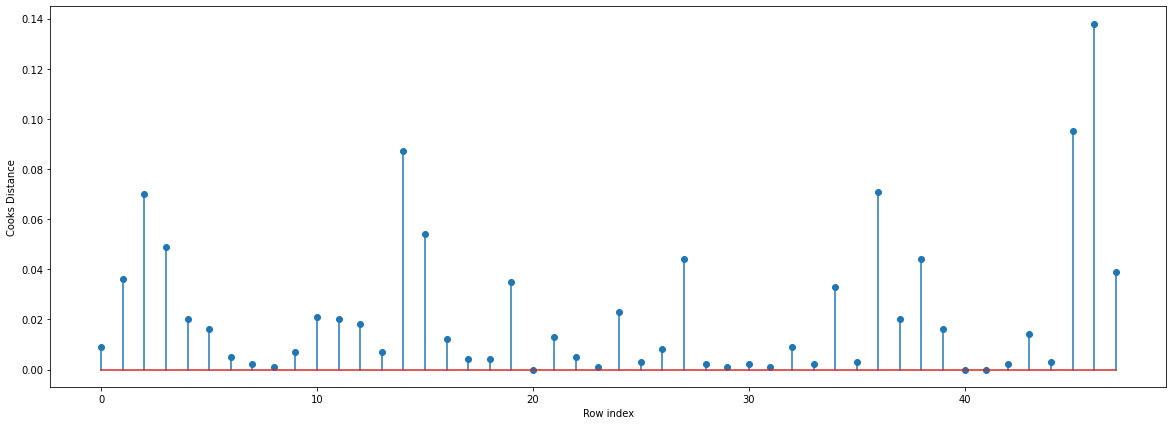

In [226]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups_new1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [227]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(46, 0.13829133994334164)

Since the value is <1 , we can stop the diagnostic process and finalize the model

#Check for VIF value

In [228]:
rsq_profit_new = smf.ols('profit~RnD+admin+market',data = startups_new1).fit().rsquared  
vif_profit_new = 1/(1-rsq_profit_new) 

# Storing vif values in a data frame
p1_new = {'Variables':['profit'],'VIF':[vif_profit_new]}
Vif_frame_new = pd.DataFrame(p1_new)  
Vif_frame_new

,Variables,VIF
0,profit,26.792855


In [229]:
#Check the accuracy of the model
(model_new.rsquared,model_new.aic)

(0.9626766170294073, 994.6690439260116)

Since the profit and accuracy is much more better than our raw model, we proceed with our new model.

**2) Using RnD and Marketing Feature Model**

In [230]:
model_rm = smf.ols("profit~RnD+market", data = startups_new1).fit()

#t and p-Values
print(model_rm.tvalues, '\n', model_rm.pvalues)

Intercept    21.573880
RnD          22.636468
market        1.899466
dtype: float64 
 Intercept    2.294807e-25
RnD          3.153169e-26
market       6.392420e-02
dtype: float64


In [231]:
# Check Coefficients
model_rm.params

Intercept    51265.583966
RnD              0.769450
market           0.024147
dtype: float64

In [232]:
#R squared values
(model_rm.rsquared, model_rm.rsquared_adj)

(0.9609119875752478, 0.9591747425785921)

# Check for VIF

In [233]:
rsq_profit_rm = smf.ols('profit~RnD+market',data = startups_new1).fit().rsquared  
vif_profit_rm = 1/(1-rsq_profit_rm) 

# Storing vif values in a data frame
p1_rm = {'Variables':['profit'],'VIF':[vif_profit_rm]}
Vif_frame_rm = pd.DataFrame(p1_rm)  
Vif_frame_rm

,Variables,VIF
0,profit,25.583291


In [234]:
#Check the accuracy of the model
(model_rm.rsquared,model_rm.aic)

(0.9609119875752478, 994.8864429429412)

We can see rsquared, VIF and accuracy of RnD and Marketing Feature Model is lower than the previous All Features Model. So, we discard this model.

**3) Using only RnD Feauture Model**

In [235]:
model_r = smf.ols("profit~RnD", data = startups_new1).fit()

#t and p-Values
print(model_r.tvalues, '\n', model_r.pvalues)

Intercept    23.843765
RnD          32.302942
dtype: float64 
 Intercept    1.553763e-27
RnD          2.914455e-33
dtype: float64


In [236]:
# Check Coefficients
model_r.params

Intercept    53117.192419
RnD              0.814169
dtype: float64

In [237]:
#R squared values
(model_r.rsquared, model_r.rsquared_adj)

(0.9577780239068537, 0.9568601548613506)

#Check for VIF

In [238]:
rsq_profit_r = smf.ols('profit~RnD',data = startups_new1).fit().rsquared  
vif_profit_r = 1/(1-rsq_profit_r) 

# Storing vif values in a data frame
p1_r = {'Variables':['profit'],'VIF':[vif_profit_r]}
Vif_frame_r = pd.DataFrame(p1_r)  
Vif_frame_r

,Variables,VIF
0,profit,23.684349


In [239]:
# Check for accuracy
(model_r.rsquared, model_r.aic)

(0.9577780239068537, 996.5884435963595)

We can see rsquared, VIF and accuracy of RnD Feature Model is lower than the previous All Features Model. So, we discard this model.

#Predicting values from Model using same dataset

Lets now analyse Root Mean Squared Error (RMSE) between the model’s predicted target value and the actual target value.


In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [241]:
startups_new1.drop('state', axis = 1, inplace = True)
startups_new1.head()

,RnD,admin,market,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [242]:
startups_new1.columns

Index(['RnD', 'admin', 'market', 'profit'], dtype='object')

**1) Using all Features**

In [243]:
x = startups_new1.drop('profit', axis = 1).values
y = startups_new1.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (48, 3)
Shape of y: (48, 1)


In [244]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 3)
Shape of X_test:  (12, 3)
Shape of y_train:  (36, 1)
Shape of y_test (12, 1)


In [245]:
#Scaling the data
x_transform = StandardScaler().fit(x_train)
y_transform = StandardScaler().fit(y_train) 

In [246]:
x_train_scaled = x_transform.transform(x_train)
x_test_scaled = x_transform.transform(x_test)
y_train_scaled = y_transform.transform(y_train)
y_test_scaled = y_transform.transform(y_test)

In [247]:
#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [248]:
# Scale the test dataset
X_test_scaled = x_transform.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = y_transform.inverse_transform(prediction)

# Predicting RMSE the Test set results
rmse_all = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("RMSE using all features: ", rmse_all)

RMSE using all features:  7318.373910957791


**2) Using RnD and Marketing Feature**

In [249]:
x = startups_new1.drop(['profit','admin'],axis=1).values
y = startups_new1.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (48, 2)
Shape of y: (48, 1)


In [250]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 2)
Shape of X_test:  (12, 2)
Shape of y_train:  (36, 1)
Shape of y_test (12, 1)


In [251]:
#Scaling the data
x_transform = StandardScaler().fit(x_train)
y_transform = StandardScaler().fit(y_train) 

In [252]:
x_train_scaled = x_transform.transform(x_train)
x_test_scaled = x_transform.transform(x_test)
y_train_scaled = y_transform.transform(y_train)
y_test_scaled = y_transform.transform(y_test)

In [253]:
#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [254]:
# Scale the test dataset
X_test_scaled = x_transform.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = y_transform.inverse_transform(prediction)

# Predicting RMSE the Test set results
rmse_rm = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("RMSE using RnD and Marketing Feature: ", rmse_rm)

RMSE using RnD and Marketing Feature:  7008.083749992922


**3) Using Only RnD feature**

In [255]:
x = startups_new1.iloc[:,:1].values
y = startups_new1.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (48, 1)
Shape of y: (48, 1)


In [256]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 1)
Shape of X_test:  (12, 1)
Shape of y_train:  (36, 1)
Shape of y_test (12, 1)


In [257]:
#Scaling the data
x_transform = StandardScaler().fit(x_train)
y_transform = StandardScaler().fit(y_train) 

In [258]:
x_train_scaled = x_transform.transform(x_train)
x_test_scaled = x_transform.transform(x_test)
y_train_scaled = y_transform.transform(y_train)
y_test_scaled = y_transform.transform(y_test)

In [259]:
#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [260]:
# Scale the test dataset
X_test_scaled = x_transform.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = y_transform.inverse_transform(prediction)

# Predicting RMSE the Test set results
rmse_r = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("RMSE using only RnD Feature: ", rmse_r)

RMSE using only RnD Feature:  6552.228787745124


**4) For Raw data**

In [270]:
startups1.drop('state', axis = 1, inplace = True)
startups1.head()

,RnD,admin,market,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [271]:
x = startups1.drop('profit', axis = 1).values
y = startups1.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (50, 3)
Shape of y: (50, 1)


In [273]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (37, 3)
Shape of X_test:  (13, 3)
Shape of y_train:  (37, 1)
Shape of y_test (13, 1)


In [274]:
#Scaling the data
x_transform = StandardScaler().fit(x_train)
y_transform = StandardScaler().fit(y_train) 

In [275]:
x_train_scaled = x_transform.transform(x_train)
x_test_scaled = x_transform.transform(x_test)
y_train_scaled = y_transform.transform(y_train)
y_test_scaled = y_transform.transform(y_test)

In [276]:
#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [277]:
# Scale the test dataset
X_test_scaled = x_transform.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = y_transform.inverse_transform(prediction)

# Predicting RMSE the Test set results
rmse_raw = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("RMSE using only RnD Feature: ", rmse_raw)

RMSE using only RnD Feature:  9308.296473497412


#Table containing R^2 values for each prepared model

In [278]:
models = {'Different_Models':['Raw data', 'Using All Features Model', 'Using RnD and Marketing Feature Model', 'Using only RnD Feauture Model'],
        'R_squared':[model.rsquared,model_new.rsquared,model_rm.rsquared,model_r.rsquared],
        'R_squared_adjusted':[model.rsquared_adj,model_new.rsquared_adj,model_rm.rsquared_adj,model_r.rsquared_adj],
        'RMSE':[rmse_raw,rmse_all,rmse_rm,rmse_r],
       'Accuracy':[model.aic,model_new.aic,model_rm.aic,model_r.aic]}
model_table = pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE,Accuracy
0,Raw data,0.950746,0.947534,9308.296473,1058.771499
1,Using All Features Model,0.962677,0.960132,7318.373911,994.669044
2,Using RnD and Marketing Feature Model,0.960912,0.959175,7008.083750,994.886443
3,Using only RnD Feauture Model,0.957778,0.956860,6552.228788,996.588444


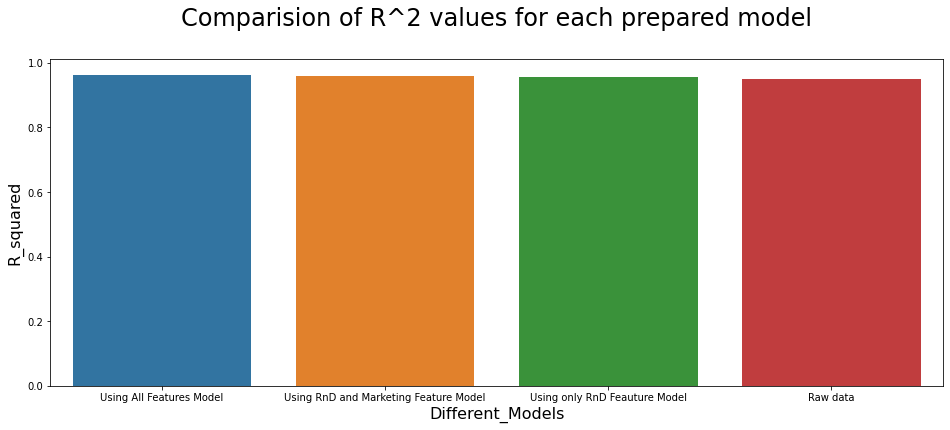

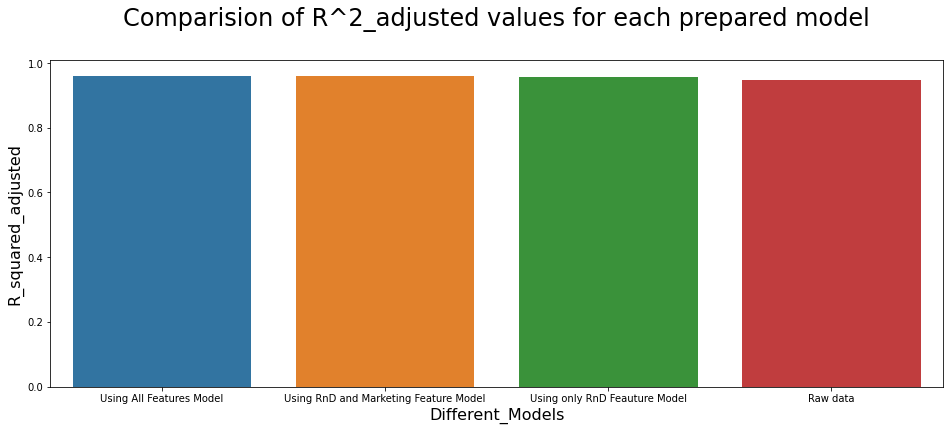

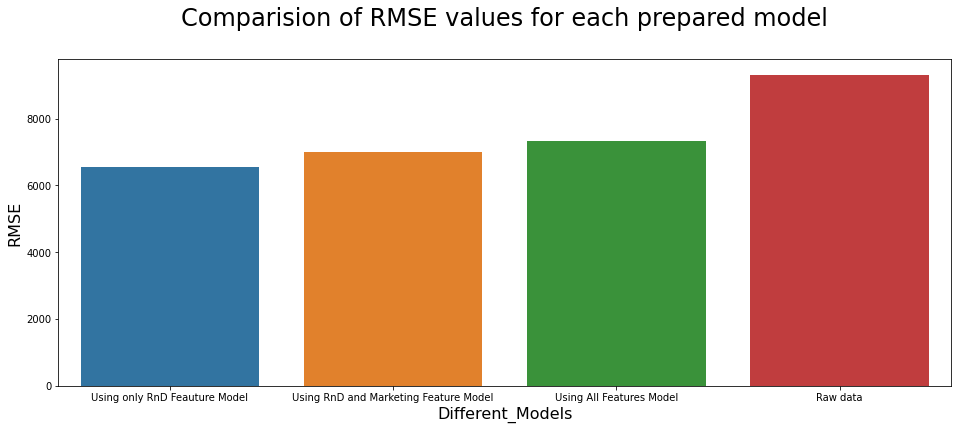

In [290]:
model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

f, axes = plt.subplots(1,1, figsize=(16,6))
sns.barplot(x='Different_Models', y='R_squared', data=model_table, ax = axes)
axes.set_xlabel('Different_Models', size=16)
axes.set_ylabel('R_squared', size=16)
plt.title('Comparision of R^2 values for each prepared model\n', size = 24)

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

f, axes = plt.subplots(1,1, figsize=(16,6))
sns.barplot(x='Different_Models', y='R_squared_adjusted', data=model_table, ax = axes)
axes.set_xlabel('Different_Models', size=16)
axes.set_ylabel('R_squared_adjusted', size=16)
plt.title('Comparision of R^2_adjusted values for each prepared model\n', size = 24)

model_table.sort_values(by=['RMSE'], ascending=True, inplace=True)

f, axes = plt.subplots(1,1, figsize=(16,6))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axes)
axes.set_xlabel('Different_Models', size=16)
axes.set_ylabel('RMSE', size=16)
plt.title('Comparision of RMSE values for each prepared model\n', size = 24)

plt.show()

#**Hence, we can conclude that Using All Features model is the best fit model for the given data in terms of R^2 and accuracy.**